## I. Data import

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [7]:
filepath = 'data/Data.csv'
data_orig = pd.read_csv(filepath)
data_orig.head(5)

,Country,CountryC,SeriesN,SeriesC,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2018,last_av
0,Lithuania,LTU,"Age at first marriage, female",SP.DYN.SMAM.FE,..,..,..,..,..,..,..,..,..,26.2,28.2,30.9,32.7,32.7
1,Lithuania,LTU,"Age at first marriage, male",SP.DYN.SMAM.MA,..,..,..,..,..,..,..,..,..,28.6,30.8,33.6,35.2999999999999,35.2999999999999
2,Lithuania,LTU,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,..,..,..,..,..,..,..,..,0,2,6,20,32,33
3,Lithuania,LTU,"Access to anti-retroviral drugs, male (%)",SH.HIV.ARTC.MA.ZS,..,..,..,..,..,..,..,..,0,4,8,21,34,36
4,Lithuania,LTU,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,22.5,18.1,17.7,15.7,15.2,16.5,15.4,11.4,9.8,8.9,9.9,10.8,10,10


## II. Data cleaning

In [8]:
#Drop columns 'SeriesC' and 'CountryC'
data_orig=data_orig.drop(['SeriesC','CountryC'],axis=1)
data_orig.head(5)

,Country,SeriesN,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2018,last_av
0,Lithuania,"Age at first marriage, female",..,..,..,..,..,..,..,..,..,26.2,28.2,30.9,32.7,32.7
1,Lithuania,"Age at first marriage, male",..,..,..,..,..,..,..,..,..,28.6,30.8,33.6,35.2999999999999,35.2999999999999
2,Lithuania,"Access to anti-retroviral drugs, female (%)",..,..,..,..,..,..,..,..,0,2,6,20,32,33
3,Lithuania,"Access to anti-retroviral drugs, male (%)",..,..,..,..,..,..,..,..,0,4,8,21,34,36
4,Lithuania,"Birth rate, crude (per 1,000 people)",22.5,18.1,17.7,15.7,15.2,16.5,15.4,11.4,9.8,8.9,9.9,10.8,10,10


In [12]:
# for i in data_orig:
#     if data_orig['2018'] == data_orig.last_av:
#         data_orig.last_av = '..'
#     elif data_orig['2018'] == '..' & data_orig.last_av != '..':
#         data_orig.['2018'] = data_orig.last_av

for row in data_orig:
    if (data_orig['2018'] == data_orig.last_av):
        print(data_orig['2018'],data_orig.last_av)
    

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [5]:
#Reshape DataFrame
data=pd.melt(frame=data_orig,id_vars=['Country','SeriesN'],
        var_name='Year', value_name='Value')
data.head(5)

,Country,SeriesN,Year,Value
0,Lithuania,"Age at first marriage, female",1960,..
1,Lithuania,"Age at first marriage, male",1960,..
2,Lithuania,"Access to anti-retroviral drugs, female (%)",1960,..
3,Lithuania,"Access to anti-retroviral drugs, male (%)",1960,..
4,Lithuania,"Birth rate, crude (per 1,000 people)",1960,22.5


In [6]:
#Replace 'last_av' with 'Last available'
data=data.replace('last_av','Last available')
#Convert missing values to NaN
data=data.replace('..',np.nan)
#Convert column 'values' type from string to float
data['Value'] = data['Value'].astype(float)
#Rename column name 'year' to uppercase
data.rename(columns={'SeriesN':'Series'},inplace=True)

In [7]:
data['Value'] = data.Value.round(2)
data.tail(10)

,Country,Series,Year,Value
5660,High income,"Smoking prevalence, females (% of adults)",Last available,19.22
5661,High income,"Smoking prevalence, males (% of adults)",Last available,29.30
5662,High income,"Suicide mortality rate, female (per 100,000 fe...",Last available,7.49
5663,High income,"Suicide mortality rate, male (per 100,000 male...",Last available,20.88
5664,High income,"Time required to start a business, female (days)",Last available,11.01
5665,High income,"Time required to start a business, male (days)",Last available,10.89
5666,High income,"Total alcohol consumption per capita, female (...",Last available,4.05
5667,High income,"Total alcohol consumption per capita, male (li...",Last available,15.69
5668,High income,"Urban population, female (% of total)",Last available,40.75
5669,High income,"Urban population, male (% of total)",Last available,39.77


In [8]:
#Extract 'Birth rate, crude (per 1,000 people)' data from DataFrame
birth_rate = data[data.Series=='Birth rate, crude (per 1,000 people)']
birth_rate

,Country,Series,Year,Value
4,Lithuania,"Birth rate, crude (per 1,000 people)",1960,22.50
49,Estonia,"Birth rate, crude (per 1,000 people)",1960,16.70
94,Latvia,"Birth rate, crude (per 1,000 people)",1960,16.70
139,Poland,"Birth rate, crude (per 1,000 people)",1960,22.60
184,Ukraine,"Birth rate, crude (per 1,000 people)",1960,21.01
...,...,...,...,...
5449,Ukraine,"Birth rate, crude (per 1,000 people)",Last available,8.70
5494,Russian Federation,"Birth rate, crude (per 1,000 people)",Last available,11.50
5539,Middle income,"Birth rate, crude (per 1,000 people)",Last available,18.00
5584,Low income,"Birth rate, crude (per 1,000 people)",Last available,34.62


In [ ]:
#data['year'] = pd.to_datetime(data['year'],format='%Y')
#birth_rate.dtypes

The first glance at the data

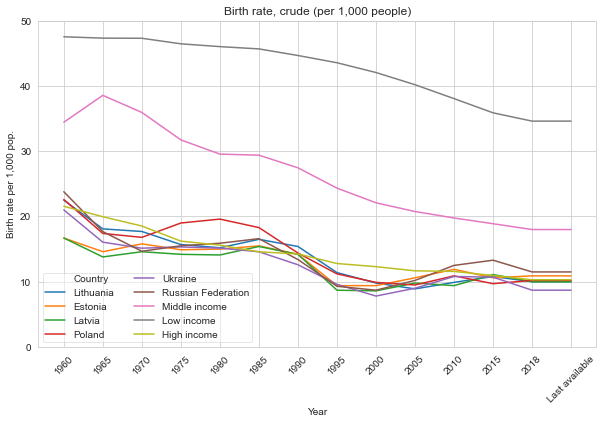

In [15]:
#Create Birt rate line plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year',y='Value',hue='Country',data=birth_rate,ax=ax)
plt.title("Birth rate, crude (per 1,000 people)")
plt.ylabel('Birth rate per 1,000 pop.')
plt.xticks(rotation=45)
plt.ylim(bottom=0,top=50)
plt.legend(loc=0,ncol=2,framealpha=0.5,borderpad=0.2)

In [10]:
#Group countries
Income_countries=data[(data.Country== 'Middle income') | (data.Country =='Low income') | (data.Country == 'High income')]
Baltic_countries = data[(data.Country == 'Lithuania') | (data.Country == 'Estonia') | (data.Country == 'Latvia')]

## III. How do Lithuania look among other countries by general indicators?

In [ ]:
#life expectancy, birth rate, death rate

In [3]:
data_orig

NameError: name 'data_orig' is not defined

## IV. What are the differences between men and woman in various countries?

## V. How did differences between men and woman in Lithuania changed through years?